<a href="https://colab.research.google.com/github/roxacarv/edulearn/blob/main/Regress%C3%A3o_M%C3%BAltipla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando bibliotecas

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import numpy as np


# 1.0 Importando base de dados

In [ ]:
# Importando base de dados que possui variaveis binárias para testar regressão logistica
df_curso = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/SUP_CURSO_2019.CSV', sep='|', encoding='latin-1', usecols=['NU_ANO_CENSO','CO_IES','CO_UF','CO_MUNICIPIO','NO_CURSO','IN_AJUDA_DEFICIENTE','QT_MATRICULA_TOTAL','QT_CONCLUINTE_TOTAL'])
df_curso_2 = df_curso.fillna(0)
df_curso_2.head()

,NU_ANO_CENSO,CO_IES,CO_UF,CO_MUNICIPIO,NO_CURSO,IN_AJUDA_DEFICIENTE,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL
0,2019,1,51.0,5103403.0,DIREITO,1,447,75
1,2019,1,51.0,5103403.0,CIÊNCIAS ECONÔMICAS,0,323,28
2,2019,1,51.0,5103403.0,ENGENHARIA CIVIL,0,248,45
3,2019,1,51.0,5103403.0,PEDAGOGIA,1,331,53
4,2019,1,51.0,5103403.0,SERVIÇO SOCIAL,1,274,32


In [ ]:
# Havia sido um teste com uma outra base de dados para talvez conseguir implementar arvores, mas infelizmente não consegui
#df_alunos = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2019.csv', sep='|', encoding='latin-1', usecols=['IN_COMPLEMENTAR_ESTAGIO', 'TP_MODALIDADE_ENSINO', 'CO_UF_NASCIMENTO', 'IN_DEFICIENCIA', 'NU_DIA_NASCIMENTO', 'NU_IDADE', 'TP_SEMESTRE_REFERENCIA', 'TP_MOBILIDADE_ACADEMICA_INTERN', 'IN_BOLSA_MONITORIA', 'IN_COMPLEMENTAR_PESQUISA', 'IN_APOIO_BOLSA_TRABALHO', 'IN_APOIO_SOCIAL', 'CO_IES_DESTINO', 'IN_BOLSA_EXTENSAO', 'IN_BOLSA_PESQUISA', 'QT_CARGA_HORARIA_INTEG', 'IN_APOIO_TRANSPORTE', 'IN_COMPLEMENTAR_MONITORIA', 'IN_ATIVIDADE_EXTRACURRICULAR', 'TP_MOBILIDADE_ACADEMICA', 'TP_SEMESTRE_CONCLUSAO', 'TP_COR_RACA', 'IN_APOIO_MATERIAL_DIDATICO', 'TP_GRAU_ACADEMICO', 'QT_CARGA_HORARIA_TOTAL', 'IN_APOIO_BOLSA_PERMANENCIA', 'IN_COMPLEMENTAR_EXTENSAO', 'IN_MATRICULA', 'TP_ESCOLA_CONCLUSAO_ENS_MEDIO', 'IN_INGRESSO_VESTIBULAR', 'TP_TURNO', 'TP_SEXO', 'IN_MOBILIDADE_ACADEMICA', 'IN_APOIO_MORADIA', 'CO_PAIS_DESTINO', 'NU_MES_NASCIMENTO', 'TP_NACIONALIDADE', 'NU_ANO_CENSO', 'NU_ANO_NASCIMENTO', 'TP_NIVEL_ACADEMICO', 'IN_BOLSA_ESTAGIO', 'IN_CONCLUINTE', 'IN_ALUNO_PARFOR', 'IN_APOIO_ALIMENTACAO', 'CO_MUNICIPIO_NASCIMENTO'])
#df_alunos.head()
#'NU_ANO_CENSO','TP_TURNO','TP_GRAU_ACADEMICO','TP_MODALIDADE_ENSINO','TP_NIVEL_ACADEMICO','TP_COR_RACA','TP_SEXO','NU_ANO_NASCIMENTO','NU_MES_NASCIMENTO','NU_DIA_NASCIMENTO','NU_IDADE','TP_NACIONALIDADE','CO_UF_NASCIMENTO','CO_MUNICIPIO_NASCIMENTO','IN_DEFICIENCIA','QT_CARGA_HORARIA_TOTAL','QT_CARGA_HORARIA_INTEG','IN_INGRESSO_VESTIBULAR','IN_APOIO_SOCIAL','IN_APOIO_ALIMENTACAO','IN_APOIO_BOLSA_PERMANENCIA','IN_APOIO_BOLSA_TRABALHO','IN_APOIO_MATERIAL_DIDATICO','IN_APOIO_MORADIA','IN_APOIO_TRANSPORTE','IN_ATIVIDADE_EXTRACURRICULAR','IN_COMPLEMENTAR_ESTAGIO','IN_COMPLEMENTAR_EXTENSAO','IN_COMPLEMENTAR_MONITORIA','IN_COMPLEMENTAR_PESQUISA','IN_BOLSA_ESTAGIO','IN_BOLSA_EXTENSAO','IN_BOLSA_MONITORIA','IN_BOLSA_PESQUISA','TP_ESCOLA_CONCLUSAO_ENS_MEDIO','IN_ALUNO_PARFOR','TP_SEMESTRE_CONCLUSAO','TP_SEMESTRE_REFERENCIA','IN_MOBILIDADE_ACADEMICA','TP_MOBILIDADE_ACADEMICA','TP_MOBILIDADE_ACADEMICA_INTERN','CO_IES_DESTINO','CO_PAIS_DESTINO','IN_MATRICULA','IN_CONCLUINTE'

Preparando dados dos alunos com deficiência por ano

In [ ]:
df_2011 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2011.csv', usecols=['CO_ALUNO', 'IN_DEF_AUDITIVA', 'IN_DEF_FISICA', 'IN_DEF_INTELECTUAL', 'IN_DEF_MULTIPLA', 'IN_DEF_SURDEZ', 'IN_DEF_SURDOCEGUEIRA', 'IN_DEF_BAIXA_VISAO', 'IN_DEF_CEGUEIRA', 'IN_DEF_SUPERDOTACAO', 'IN_TGD_AUTISMO_INFANTIL', 'IN_TGD_SINDROME_ASPERGER', 'IN_TGD_SINDROME_RETT', 'IN_TGD_TRANSTOR_DESINTEGRATIVO'])
df_2011['NU_ANO_CENSO'] = 2011

In [ ]:
df_2012 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2012.csv', usecols=['CO_ALUNO', 'IN_DEF_AUDITIVA', 'IN_DEF_FISICA', 'IN_DEF_INTELECTUAL', 'IN_DEF_MULTIPLA', 'IN_DEF_SURDEZ', 'IN_DEF_SURDOCEGUEIRA', 'IN_DEF_BAIXA_VISAO', 'IN_DEF_CEGUEIRA', 'IN_DEF_SUPERDOTACAO', 'IN_TGD_AUTISMO_INFANTIL', 'IN_TGD_SINDROME_ASPERGER', 'IN_TGD_SINDROME_RETT', 'IN_TGD_TRANSTOR_DESINTEGRATIVO'])
df_2012['NU_ANO_CENSO'] = 2012

In [ ]:
df_2013 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2013.csv', usecols=['CO_ALUNO', 'IN_DEF_AUDITIVA', 'IN_DEF_FISICA', 'IN_DEF_INTELECTUAL', 'IN_DEF_MULTIPLA', 'IN_DEF_SURDEZ', 'IN_DEF_SURDOCEGUEIRA', 'IN_DEF_BAIXA_VISAO', 'IN_DEF_CEGUEIRA', 'IN_DEF_SUPERDOTACAO', 'IN_TGD_AUTISMO_INFANTIL', 'IN_TGD_SINDROME_ASPERGER', 'IN_TGD_SINDROME_RETT', 'IN_TGD_TRANSTOR_DESINTEGRATIVO'])
df_2013['NU_ANO_CENSO'] = 2013

In [ ]:
df_2014 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2014.csv', usecols=['CO_ALUNO', 'IN_DEF_AUDITIVA', 'IN_DEF_FISICA', 'IN_DEF_INTELECTUAL', 'IN_DEF_MULTIPLA', 'IN_DEF_SURDEZ', 'IN_DEF_SURDOCEGUEIRA', 'IN_DEF_BAIXA_VISAO', 'IN_DEF_CEGUEIRA', 'IN_DEF_SUPERDOTACAO', 'IN_TGD_AUTISMO_INFANTIL', 'IN_TGD_SINDROME_ASPERGER', 'IN_TGD_SINDROME_RETT', 'IN_TGD_TRANSTOR_DESINTEGRATIVO'])
df_2014['NU_ANO_CENSO'] = 2014

In [ ]:
df_2015 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2015.csv', usecols=['CO_ALUNO', 'IN_DEF_AUDITIVA', 'IN_DEF_FISICA', 'IN_DEF_INTELECTUAL', 'IN_DEF_MULTIPLA', 'IN_DEF_SURDEZ', 'IN_DEF_SURDOCEGUEIRA', 'IN_DEF_BAIXA_VISAO', 'IN_DEF_CEGUEIRA', 'IN_DEF_SUPERDOTACAO', 'IN_TGD_AUTISMO_INFANTIL', 'IN_TGD_SINDROME_ASPERGER', 'IN_TGD_SINDROME_RETT', 'IN_TGD_TRANSTOR_DESINTEGRATIVO'])
df_2015['NU_ANO_CENSO'] = 2015

In [ ]:
df_2016 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2016.csv', usecols=['CO_ALUNO', 'IN_DEF_AUDITIVA', 'IN_DEF_FISICA', 'IN_DEF_INTELECTUAL', 'IN_DEF_MULTIPLA', 'IN_DEF_SURDEZ', 'IN_DEF_SURDOCEGUEIRA', 'IN_DEF_BAIXA_VISAO', 'IN_DEF_CEGUEIRA', 'IN_DEF_SUPERDOTACAO', 'IN_TGD_AUTISMO_INFANTIL', 'IN_TGD_SINDROME_ASPERGER', 'IN_TGD_SINDROME_RETT', 'IN_TGD_TRANSTOR_DESINTEGRATIVO'])
df_2016['NU_ANO_CENSO'] = 2016

In [ ]:
df_2017 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2017.csv', usecols=['CO_ALUNO', 'IN_DEFICIENCIA_AUDITIVA', 'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_INTELECTUAL', 'IN_DEFICIENCIA_MULTIPLA', 'IN_DEFICIENCIA_SURDEZ', 'IN_DEFICIENCIA_SURDOCEGUEIRA', 'IN_DEFICIENCIA_BAIXA_VISAO', 'IN_DEFICIENCIA_CEGUEIRA', 'IN_DEFICIENCIA_SUPERDOTACAO', 'IN_TGD_AUTISMO_INFANTIL', 'IN_TGD_SINDROME_ASPERGER', 'IN_TGD_SINDROME_RETT', 'IN_TGD_TRANSTOR_DESINTEGRATIVO'])
df_2017['NU_ANO_CENSO'] = 2017

In [ ]:
df_2018 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2018.csv', usecols=['ID_ALUNO', 'IN_DEFICIENCIA_AUDITIVA', 'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_INTELECTUAL', 'IN_DEFICIENCIA_MULTIPLA', 'IN_DEFICIENCIA_SURDEZ', 'IN_DEFICIENCIA_SURDOCEGUEIRA', 'IN_DEFICIENCIA_BAIXA_VISAO', 'IN_DEFICIENCIA_CEGUEIRA', 'IN_DEFICIENCIA_SUPERDOTACAO', 'IN_TGD_AUTISMO', 'IN_TGD_SINDROME_ASPERGER', 'IN_TGD_SINDROME_RETT', 'IN_TGD_TRANSTOR_DESINTEGRATIVO'])
df_2018['NU_ANO_CENSO'] = 2018

In [ ]:
df_2019 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2019.csv', usecols=['ID_ALUNO', 'IN_DEFICIENCIA_AUDITIVA', 'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_INTELECTUAL', 'IN_DEFICIENCIA_MULTIPLA', 'IN_DEFICIENCIA_SURDEZ', 'IN_DEFICIENCIA_SURDOCEGUEIRA', 'IN_DEFICIENCIA_BAIXA_VISAO', 'IN_DEFICIENCIA_CEGUEIRA', 'IN_DEFICIENCIA_SUPERDOTACAO', 'IN_TGD_AUTISMO', 'IN_TGD_SINDROME_ASPERGER', 'IN_TGD_SINDROME_RETT', 'IN_TGD_TRANSTOR_DESINTEGRATIVO'])
df_2019['NU_ANO_CENSO'] = 2019

In [ ]:
df_regressao = pd.concat([df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019])
df_regressao['QNT_DE_ALUNOS'] = 'NaN'
df_alunos_anos = df_regressao.groupby('NU_ANO_CENSO').agg({'QNT_DE_ALUNOS': ['count']}).reset_index()
df_alunos_anos = df_alunos_anos.rename(columns={
    'NU_ANO_CENSO':'ANO_CENSO',
})
df_alunos_anos

,ANO_CENSO,QNT_DE_ALUNOS
,,count
0,2011,29033
1,2012,34656
2,2013,37796
3,2014,45088
4,2015,51685
5,2016,49813
6,2017,52542
7,2018,59496
8,2019,66750


Preparando dados dos recursos e dos alunos concluintes por ano

In [ ]:
df_curso_2019 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/SUP_CURSO_2019.CSV', sep='|', encoding='latin-1', usecols=['NU_ANO_CENSO','TP_SITUACAO','IN_AJUDA_DEFICIENTE','IN_MATERIAL_DIGITAL','IN_MATERIAL_AMPLIADO','IN_MATERIAL_TATIL','IN_MATERIAL_IMPRESSO','IN_MATERIAL_AUDIO','IN_MATERIAL_BRAILLE','IN_MATERIAL_LIBRAS','IN_DISCIPLINA_LIBRAS','IN_TRADUTOR_LIBRAS','IN_GUIA_INTERPRETE','IN_RECURSOS_COMUNICACAO','IN_RECURSOS_INFORMATICA','QT_CONCLUINTE_TOTAL'])
df_curso_2019.head()

,NU_ANO_CENSO,TP_SITUACAO,IN_AJUDA_DEFICIENTE,IN_MATERIAL_DIGITAL,IN_MATERIAL_AMPLIADO,IN_MATERIAL_TATIL,IN_MATERIAL_IMPRESSO,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA,QT_CONCLUINTE_TOTAL
0,2019,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,75
1,2019,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
2,2019,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45
3,2019,1,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,53
4,2019,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,32


In [ ]:
#Renomeando as colunas
df_curso_2019 = df_curso_2019.rename(columns={
    'NU_ANO_CENSO':'ANO_CENSO',
    'TP_SITUACAO':'SITUACAO',
    'IN_AJUDA_DEFICIENTE':'ACESSIBILIDADE_DEFICIENTE',
    'IN_MATERIAL_DIGITAL':'MATERIAL_DIGITAL',
    'IN_MATERIAL_AMPLIADO':'MATERIAL_AMPLIADO',
    'IN_MATERIAL_TATIL':'MATERIAL_TATIL',
    'IN_MATERIAL_IMPRESSO':'MATERIAL_IMPRESSO',
    'IN_MATERIAL_AUDIO':'MATERIAL_AUDIO',
    'IN_MATERIAL_BRAILLE':'MATERIAL_BRAILLE',
    'IN_MATERIAL_LIBRAS':'MATERIAL_LIBRAS',
    'IN_DISCIPLINA_LIBRAS':'DISCIPLINA_LIBRAS',
    'IN_TRADUTOR_LIBRAS':'TRADUTOR_LIBRAS',
    'IN_GUIA_INTERPRETE':'GUIA_INTERPRETE',
    'IN_RECURSOS_COMUNICACAO':'RECURSOS_COMUNICACAO',
    'IN_RECURSOS_INFORMATICA':'RECURSOS_INFORMATICA',
    'QT_MATRICULA_TOTAL':'NUM_ALUNOS_MATRICULADOS',
    'QT_CONCLUINTE_TOTAL':'NUM_ALUNOS_CONCLUINTES',
})
df_curso_2019.head()

,ANO_CENSO,SITUACAO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,NUM_ALUNOS_CONCLUINTES
0,2019,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,75
1,2019,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
2,2019,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45
3,2019,1,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,53
4,2019,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,32


In [ ]:
#Calcular a quantidade de recursos de acessibilidade ofertados por cada curso
def contar_recursos(row):
  return row['MATERIAL_DIGITAL'] + row['MATERIAL_AMPLIADO'] + row['MATERIAL_TATIL'] + row['MATERIAL_IMPRESSO'] + row['MATERIAL_AUDIO'] + row['MATERIAL_BRAILLE'] + row['MATERIAL_LIBRAS'] + row['DISCIPLINA_LIBRAS'] + row['TRADUTOR_LIBRAS'] + row['GUIA_INTERPRETE'] + row['RECURSOS_COMUNICACAO'] + row['RECURSOS_INFORMATICA']

df_curso_2019['RECURSOS'] = df_curso_2019.apply(contar_recursos, axis=1)
df_curso_2019.head()

,ANO_CENSO,SITUACAO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,NUM_ALUNOS_CONCLUINTES,RECURSOS
0,2019,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,75,1.0
1,2019,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,NaN
2,2019,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45,NaN
3,2019,1,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,53,9.0
4,2019,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,32,1.0


In [ ]:
recursos_ano_2019 = df_curso_2019[['ANO_CENSO','RECURSOS', 'NUM_ALUNOS_CONCLUINTES']].groupby('ANO_CENSO').agg(['count'])
recursos_ano_2019

,RECURSOS,NUM_ALUNOS_CONCLUINTES
,count,count
ANO_CENSO,,
2019,37401,40709


In [ ]:
df_curso_2018 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/SUP_CURSO_2018.CSV', sep='|', encoding='latin-1', usecols=['NU_ANO_CENSO','TP_SITUACAO','IN_AJUDA_DEFICIENTE','IN_MATERIAL_DIGITAL','IN_MATERIAL_AMPLIADO','IN_MATERIAL_TATIL','IN_MATERIAL_IMPRESSO','IN_MATERIAL_AUDIO','IN_MATERIAL_BRAILLE','IN_MATERIAL_LIBRAS','IN_DISCIPLINA_LIBRAS','IN_TRADUTOR_LIBRAS','IN_GUIA_INTERPRETE','IN_RECURSOS_COMUNICACAO','IN_RECURSOS_INFORMATICA','QT_CONCLUINTE_TOTAL'])
df_curso_2018.head()

,NU_ANO_CENSO,TP_SITUACAO,IN_AJUDA_DEFICIENTE,IN_MATERIAL_DIGITAL,IN_MATERIAL_AMPLIADO,IN_MATERIAL_TATIL,IN_MATERIAL_IMPRESSO,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA,QT_CONCLUINTE_TOTAL
0,2018,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,76
1,2018,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,38
2,2018,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34
3,2018,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,49
4,2018,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,23


In [ ]:
#Renomeando as colunas
df_curso_2018 = df_curso_2018.rename(columns={
    'NU_ANO_CENSO':'ANO_CENSO',
    'TP_SITUACAO':'SITUACAO',
    'IN_AJUDA_DEFICIENTE':'ACESSIBILIDADE_DEFICIENTE',
    'IN_MATERIAL_DIGITAL':'MATERIAL_DIGITAL',
    'IN_MATERIAL_AMPLIADO':'MATERIAL_AMPLIADO',
    'IN_MATERIAL_TATIL':'MATERIAL_TATIL',
    'IN_MATERIAL_IMPRESSO':'MATERIAL_IMPRESSO',
    'IN_MATERIAL_AUDIO':'MATERIAL_AUDIO',
    'IN_MATERIAL_BRAILLE':'MATERIAL_BRAILLE',
    'IN_MATERIAL_LIBRAS':'MATERIAL_LIBRAS',
    'IN_DISCIPLINA_LIBRAS':'DISCIPLINA_LIBRAS',
    'IN_TRADUTOR_LIBRAS':'TRADUTOR_LIBRAS',
    'IN_GUIA_INTERPRETE':'GUIA_INTERPRETE',
    'IN_RECURSOS_COMUNICACAO':'RECURSOS_COMUNICACAO',
    'IN_RECURSOS_INFORMATICA':'RECURSOS_INFORMATICA',
    'QT_MATRICULA_TOTAL':'NUM_ALUNOS_MATRICULADOS',
    'QT_CONCLUINTE_TOTAL':'NUM_ALUNOS_CONCLUINTES',
})
df_curso_2018.head()

,ANO_CENSO,SITUACAO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,NUM_ALUNOS_CONCLUINTES
0,2018,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,76
1,2018,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,38
2,2018,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34
3,2018,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,49
4,2018,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,23


In [ ]:
#Calcular a quantidade de recursos de acessibilidade ofertados por cada curso
def contar_recursos(row):
  return row['MATERIAL_DIGITAL'] + row['MATERIAL_AMPLIADO'] + row['MATERIAL_TATIL'] + row['MATERIAL_IMPRESSO'] + row['MATERIAL_AUDIO'] + row['MATERIAL_BRAILLE'] + row['MATERIAL_LIBRAS'] + row['DISCIPLINA_LIBRAS'] + row['TRADUTOR_LIBRAS'] + row['GUIA_INTERPRETE'] + row['RECURSOS_COMUNICACAO'] + row['RECURSOS_INFORMATICA']

df_curso_2018['RECURSOS'] = df_curso_2018.apply(contar_recursos, axis=1)
df_curso_2018.head()

,ANO_CENSO,SITUACAO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,NUM_ALUNOS_CONCLUINTES,RECURSOS
0,2018,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,76,1.0
1,2018,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,38,1.0
2,2018,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,NaN
3,2018,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,49,1.0
4,2018,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,23,1.0


In [ ]:
recursos_ano_2018 = df_curso_2018[['ANO_CENSO','RECURSOS', 'NUM_ALUNOS_CONCLUINTES']].groupby('ANO_CENSO').agg(['count'])
recursos_ano_2018

,RECURSOS,NUM_ALUNOS_CONCLUINTES
,count,count
ANO_CENSO,,
2018,34765,38256


In [ ]:
df_curso_2017 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/SUP_CURSO_2017.CSV', sep='|', encoding='latin-1', usecols=['NU_ANO_CENSO','TP_SITUACAO','IN_AJUDA_DEFICIENTE','IN_MATERIAL_DIGITAL','IN_MATERIAL_AMPLIADO','IN_MATERIAL_TATIL','IN_MATERIAL_IMPRESSO','IN_MATERIAL_AUDIO','IN_MATERIAL_BRAILLE','IN_MATERIAL_LIBRAS','IN_DISCIPLINA_LIBRAS','IN_TRADUTOR_LIBRAS','IN_GUIA_INTERPRETE','IN_RECURSOS_COMUNICACAO','IN_RECURSOS_INFORMATICA','QT_CONCLUINTE_TOTAL'])
df_curso_2017.head()

,NU_ANO_CENSO,TP_SITUACAO,IN_AJUDA_DEFICIENTE,IN_MATERIAL_DIGITAL,IN_MATERIAL_AMPLIADO,IN_MATERIAL_TATIL,IN_MATERIAL_IMPRESSO,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA,QT_CONCLUINTE_TOTAL
0,2017,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,2017,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,13
2,2017,1,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,26
3,2017,1,1,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,35
4,2017,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6


In [ ]:
#Renomeando as colunas
df_curso_2017 = df_curso_2017.rename(columns={
    'NU_ANO_CENSO':'ANO_CENSO',
    'TP_SITUACAO':'SITUACAO',
    'IN_AJUDA_DEFICIENTE':'ACESSIBILIDADE_DEFICIENTE',
    'IN_MATERIAL_DIGITAL':'MATERIAL_DIGITAL',
    'IN_MATERIAL_AMPLIADO':'MATERIAL_AMPLIADO',
    'IN_MATERIAL_TATIL':'MATERIAL_TATIL',
    'IN_MATERIAL_IMPRESSO':'MATERIAL_IMPRESSO',
    'IN_MATERIAL_AUDIO':'MATERIAL_AUDIO',
    'IN_MATERIAL_BRAILLE':'MATERIAL_BRAILLE',
    'IN_MATERIAL_LIBRAS':'MATERIAL_LIBRAS',
    'IN_DISCIPLINA_LIBRAS':'DISCIPLINA_LIBRAS',
    'IN_TRADUTOR_LIBRAS':'TRADUTOR_LIBRAS',
    'IN_GUIA_INTERPRETE':'GUIA_INTERPRETE',
    'IN_RECURSOS_COMUNICACAO':'RECURSOS_COMUNICACAO',
    'IN_RECURSOS_INFORMATICA':'RECURSOS_INFORMATICA',
    'QT_MATRICULA_TOTAL':'NUM_ALUNOS_MATRICULADOS',
    'QT_CONCLUINTE_TOTAL':'NUM_ALUNOS_CONCLUINTES',
})
df_curso_2017.head()

,ANO_CENSO,SITUACAO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,NUM_ALUNOS_CONCLUINTES
0,2017,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,2017,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,13
2,2017,1,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,26
3,2017,1,1,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,35
4,2017,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6


In [ ]:
#Calcular a quantidade de recursos de acessibilidade ofertados por cada curso
def contar_recursos(row):
  return row['MATERIAL_DIGITAL'] + row['MATERIAL_AMPLIADO'] + row['MATERIAL_TATIL'] + row['MATERIAL_IMPRESSO'] + row['MATERIAL_AUDIO'] + row['MATERIAL_BRAILLE'] + row['MATERIAL_LIBRAS'] + row['DISCIPLINA_LIBRAS'] + row['TRADUTOR_LIBRAS'] + row['GUIA_INTERPRETE'] + row['RECURSOS_COMUNICACAO'] + row['RECURSOS_INFORMATICA']

df_curso_2017['RECURSOS'] = df_curso_2017.apply(contar_recursos, axis=1)
df_curso_2017.head()

,ANO_CENSO,SITUACAO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,NUM_ALUNOS_CONCLUINTES,RECURSOS
0,2017,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1.0
1,2017,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,13,11.0
2,2017,1,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,26,4.0
3,2017,1,1,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,35,8.0
4,2017,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6,1.0


In [ ]:
recursos_ano_2017 = df_curso_2017[['ANO_CENSO','RECURSOS', 'NUM_ALUNOS_CONCLUINTES']].groupby('ANO_CENSO').agg(['count'])
recursos_ano_2017

,RECURSOS,NUM_ALUNOS_CONCLUINTES
,count,count
ANO_CENSO,,
2017,31836,35693


In [ ]:
df_curso_2016 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/SUP_CURSO_2016.CSV', sep='|', encoding='latin-1', usecols=['NU_ANO_CENSO','TP_SITUACAO','IN_AJUDA_DEFICIENTE','IN_MATERIAL_DIGITAL','IN_MATERIAL_AMPLIADO','IN_MATERIAL_TATIL','IN_MATERIAL_IMPRESSO','IN_MATERIAL_AUDIO','IN_MATERIAL_BRAILLE','IN_MATERIAL_LIBRAS','IN_DISCIPLINA_LIBRAS','IN_TRADUTOR_LIBRAS','IN_GUIA_INTERPRETE','IN_RECURSOS_COMUNICACAO','IN_RECURSOS_INFORMATICA','QT_CONCLUINTE_TOTAL'])
df_curso_2016.head()

,NU_ANO_CENSO,TP_SITUACAO,IN_AJUDA_DEFICIENTE,IN_MATERIAL_DIGITAL,IN_MATERIAL_AMPLIADO,IN_MATERIAL_TATIL,IN_MATERIAL_IMPRESSO,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA,QT_CONCLUINTE_TOTAL
0,2016,1,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0
1,2016,1,1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,26
2,2016,1,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,44
3,2016,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,39
4,2016,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,45


In [ ]:
#Renomeando as colunas
df_curso_2016 = df_curso_2016.rename(columns={
    'NU_ANO_CENSO':'ANO_CENSO',
    'TP_SITUACAO':'SITUACAO',
    'IN_AJUDA_DEFICIENTE':'ACESSIBILIDADE_DEFICIENTE',
    'IN_MATERIAL_DIGITAL':'MATERIAL_DIGITAL',
    'IN_MATERIAL_AMPLIADO':'MATERIAL_AMPLIADO',
    'IN_MATERIAL_TATIL':'MATERIAL_TATIL',
    'IN_MATERIAL_IMPRESSO':'MATERIAL_IMPRESSO',
    'IN_MATERIAL_AUDIO':'MATERIAL_AUDIO',
    'IN_MATERIAL_BRAILLE':'MATERIAL_BRAILLE',
    'IN_MATERIAL_LIBRAS':'MATERIAL_LIBRAS',
    'IN_DISCIPLINA_LIBRAS':'DISCIPLINA_LIBRAS',
    'IN_TRADUTOR_LIBRAS':'TRADUTOR_LIBRAS',
    'IN_GUIA_INTERPRETE':'GUIA_INTERPRETE',
    'IN_RECURSOS_COMUNICACAO':'RECURSOS_COMUNICACAO',
    'IN_RECURSOS_INFORMATICA':'RECURSOS_INFORMATICA',
    'QT_MATRICULA_TOTAL':'NUM_ALUNOS_MATRICULADOS',
    'QT_CONCLUINTE_TOTAL':'NUM_ALUNOS_CONCLUINTES',
})
df_curso_2016.head()

,ANO_CENSO,SITUACAO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,NUM_ALUNOS_CONCLUINTES
0,2016,1,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0
1,2016,1,1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,26
2,2016,1,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,44
3,2016,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,39
4,2016,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,45


In [ ]:
#Calcular a quantidade de recursos de acessibilidade ofertados por cada curso
def contar_recursos(row):
  return row['MATERIAL_DIGITAL'] + row['MATERIAL_AMPLIADO'] + row['MATERIAL_TATIL'] + row['MATERIAL_IMPRESSO'] + row['MATERIAL_AUDIO'] + row['MATERIAL_BRAILLE'] + row['MATERIAL_LIBRAS'] + row['DISCIPLINA_LIBRAS'] + row['TRADUTOR_LIBRAS'] + row['GUIA_INTERPRETE'] + row['RECURSOS_COMUNICACAO'] + row['RECURSOS_INFORMATICA']

df_curso_2016['RECURSOS'] = df_curso_2016.apply(contar_recursos, axis=1)
df_curso_2016.head()

,ANO_CENSO,SITUACAO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,NUM_ALUNOS_CONCLUINTES,RECURSOS
0,2016,1,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0,10.0
1,2016,1,1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,26,7.0
2,2016,1,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,44,5.0
3,2016,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,39,2.0
4,2016,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,45,1.0


In [ ]:
recursos_ano_2016 = df_curso_2016[['ANO_CENSO','RECURSOS', 'NUM_ALUNOS_CONCLUINTES']].groupby('ANO_CENSO').agg(['count'])
recursos_ano_2016

,RECURSOS,NUM_ALUNOS_CONCLUINTES
,count,count
ANO_CENSO,,
2016,30806,34695


In [ ]:
df_curso_2015 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/SUP_CURSO_2015.CSV', sep='|', encoding='latin-1', usecols=['NU_ANO_CENSO','TP_SITUACAO','IN_AJUDA_DEFICIENTE','IN_MATERIAL_DIGITAL','IN_MATERIAL_AMPLIADO','IN_MATERIAL_TATIL','IN_MATERIAL_IMPRESSO','IN_MATERIAL_AUDIO','IN_MATERIAL_BRAILLE','IN_MATERIAL_LIBRAS','IN_DISCIPLINA_LIBRAS','IN_TRADUTOR_LIBRAS','IN_GUIA_INTERPRETE','IN_RECURSOS_COMUNICACAO','IN_RECURSOS_INFORMATICA','QT_CONCLUINTE_TOTAL'])
df_curso_2015.head()

,NU_ANO_CENSO,TP_SITUACAO,IN_AJUDA_DEFICIENTE,IN_MATERIAL_DIGITAL,IN_MATERIAL_AMPLIADO,IN_MATERIAL_TATIL,IN_MATERIAL_IMPRESSO,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA,QT_CONCLUINTE_TOTAL
0,2015,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
1,2015,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2015,1,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,22
3,2015,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,20
4,2015,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3


In [ ]:
#Renomeando as colunas
df_curso_2015 = df_curso_2015.rename(columns={
    'NU_ANO_CENSO':'ANO_CENSO',
    'TP_SITUACAO':'SITUACAO',
    'IN_AJUDA_DEFICIENTE':'ACESSIBILIDADE_DEFICIENTE',
    'IN_MATERIAL_DIGITAL':'MATERIAL_DIGITAL',
    'IN_MATERIAL_AMPLIADO':'MATERIAL_AMPLIADO',
    'IN_MATERIAL_TATIL':'MATERIAL_TATIL',
    'IN_MATERIAL_IMPRESSO':'MATERIAL_IMPRESSO',
    'IN_MATERIAL_AUDIO':'MATERIAL_AUDIO',
    'IN_MATERIAL_BRAILLE':'MATERIAL_BRAILLE',
    'IN_MATERIAL_LIBRAS':'MATERIAL_LIBRAS',
    'IN_DISCIPLINA_LIBRAS':'DISCIPLINA_LIBRAS',
    'IN_TRADUTOR_LIBRAS':'TRADUTOR_LIBRAS',
    'IN_GUIA_INTERPRETE':'GUIA_INTERPRETE',
    'IN_RECURSOS_COMUNICACAO':'RECURSOS_COMUNICACAO',
    'IN_RECURSOS_INFORMATICA':'RECURSOS_INFORMATICA',
    'QT_MATRICULA_TOTAL':'NUM_ALUNOS_MATRICULADOS',
    'QT_CONCLUINTE_TOTAL':'NUM_ALUNOS_CONCLUINTES',
})
df_curso_2015.head()

,ANO_CENSO,SITUACAO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,NUM_ALUNOS_CONCLUINTES
0,2015,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
1,2015,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2015,1,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,22
3,2015,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,20
4,2015,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3


In [ ]:
#Calcular a quantidade de recursos de acessibilidade ofertados por cada curso
def contar_recursos(row):
  return row['MATERIAL_DIGITAL'] + row['MATERIAL_AMPLIADO'] + row['MATERIAL_TATIL'] + row['MATERIAL_IMPRESSO'] + row['MATERIAL_AUDIO'] + row['MATERIAL_BRAILLE'] + row['MATERIAL_LIBRAS'] + row['DISCIPLINA_LIBRAS'] + row['TRADUTOR_LIBRAS'] + row['GUIA_INTERPRETE'] + row['RECURSOS_COMUNICACAO'] + row['RECURSOS_INFORMATICA']

df_curso_2015['RECURSOS'] = df_curso_2015.apply(contar_recursos, axis=1)
df_curso_2015.head()

,ANO_CENSO,SITUACAO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,NUM_ALUNOS_CONCLUINTES,RECURSOS
0,2015,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,1.0
1,2015,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2015,1,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,22,7.0
3,2015,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,20,1.0
4,2015,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3,2.0


In [ ]:
recursos_ano_2015 = df_curso_2015[['ANO_CENSO','RECURSOS', 'NUM_ALUNOS_CONCLUINTES']].groupby('ANO_CENSO').agg(['count'])
recursos_ano_2015

,RECURSOS,NUM_ALUNOS_CONCLUINTES
,count,count
ANO_CENSO,,
2015,29395,33873


In [ ]:
df_curso_2014 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/SUP_CURSO_2014.CSV', sep='|', encoding='latin-1', usecols=['NU_ANO_CENSO','TP_SITUACAO','IN_AJUDA_DEFICIENTE','IN_MATERIAL_DIGITAL','IN_MATERIAL_AMPLIADO','IN_MATERIAL_TATIL','IN_MATERIAL_IMPRESSO','IN_MATERIAL_AUDIO','IN_MATERIAL_BRAILLE','IN_MATERIAL_LIBRAS','IN_DISCIPLINA_LIBRAS','IN_TRADUTOR_LIBRAS','IN_GUIA_INTERPRETE','IN_RECURSOS_COMUNICACAO','IN_RECURSOS_INFORMATICA','QT_CONCLUINTE_TOTAL'])
df_curso_2014.head()

,NU_ANO_CENSO,TP_SITUACAO,IN_AJUDA_DEFICIENTE,IN_MATERIAL_DIGITAL,IN_MATERIAL_AMPLIADO,IN_MATERIAL_TATIL,IN_MATERIAL_IMPRESSO,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA,QT_CONCLUINTE_TOTAL
0,2014,1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,50
1,2014,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,15
2,2014,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0
3,2014,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17
4,2014,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,48


In [ ]:
#Renomeando as colunas
df_curso_2014 = df_curso_2014.rename(columns={
    'NU_ANO_CENSO':'ANO_CENSO',
    'TP_SITUACAO':'SITUACAO',
    'IN_AJUDA_DEFICIENTE':'ACESSIBILIDADE_DEFICIENTE',
    'IN_MATERIAL_DIGITAL':'MATERIAL_DIGITAL',
    'IN_MATERIAL_AMPLIADO':'MATERIAL_AMPLIADO',
    'IN_MATERIAL_TATIL':'MATERIAL_TATIL',
    'IN_MATERIAL_IMPRESSO':'MATERIAL_IMPRESSO',
    'IN_MATERIAL_AUDIO':'MATERIAL_AUDIO',
    'IN_MATERIAL_BRAILLE':'MATERIAL_BRAILLE',
    'IN_MATERIAL_LIBRAS':'MATERIAL_LIBRAS',
    'IN_DISCIPLINA_LIBRAS':'DISCIPLINA_LIBRAS',
    'IN_TRADUTOR_LIBRAS':'TRADUTOR_LIBRAS',
    'IN_GUIA_INTERPRETE':'GUIA_INTERPRETE',
    'IN_RECURSOS_COMUNICACAO':'RECURSOS_COMUNICACAO',
    'IN_RECURSOS_INFORMATICA':'RECURSOS_INFORMATICA',
    'QT_MATRICULA_TOTAL':'NUM_ALUNOS_MATRICULADOS',
    'QT_CONCLUINTE_TOTAL':'NUM_ALUNOS_CONCLUINTES',
})
df_curso_2014.head()

,ANO_CENSO,SITUACAO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,NUM_ALUNOS_CONCLUINTES
0,2014,1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,50
1,2014,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,15
2,2014,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0
3,2014,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17
4,2014,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,48


In [ ]:
#Calcular a quantidade de recursos de acessibilidade ofertados por cada curso
def contar_recursos(row):
  return row['MATERIAL_DIGITAL'] + row['MATERIAL_AMPLIADO'] + row['MATERIAL_TATIL'] + row['MATERIAL_IMPRESSO'] + row['MATERIAL_AUDIO'] + row['MATERIAL_BRAILLE'] + row['MATERIAL_LIBRAS'] + row['DISCIPLINA_LIBRAS'] + row['TRADUTOR_LIBRAS'] + row['GUIA_INTERPRETE'] + row['RECURSOS_COMUNICACAO'] + row['RECURSOS_INFORMATICA']

df_curso_2014['RECURSOS'] = df_curso_2014.apply(contar_recursos, axis=1)
df_curso_2014.head()

,ANO_CENSO,SITUACAO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,NUM_ALUNOS_CONCLUINTES,RECURSOS
0,2014,1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,50,5.0
1,2014,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,15,11.0
2,2014,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0,4.0
3,2014,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17,1.0
4,2014,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,48,5.0


In [ ]:
recursos_ano_2014 = df_curso_2014[['ANO_CENSO','RECURSOS', 'NUM_ALUNOS_CONCLUINTES']].groupby('ANO_CENSO').agg(['count'])
recursos_ano_2014

,RECURSOS,NUM_ALUNOS_CONCLUINTES
,count,count
ANO_CENSO,,
2014,28422,33273


In [ ]:
df_curso_2013 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/SUP_CURSO_2013.CSV', sep='|', encoding='latin-1', usecols=['NU_ANO_CENSO','TP_SITUACAO','IN_AJUDA_DEFICIENTE','IN_MATERIAL_DIGITAL','IN_MATERIAL_AMPLIADO','IN_MATERIAL_TATIL','IN_MATERIAL_IMPRESSO','IN_MATERIAL_AUDIO','IN_MATERIAL_BRAILLE','IN_MATERIAL_LIBRAS','IN_DISCIPLINA_LIBRAS','IN_TRADUTOR_LIBRAS','IN_GUIA_INTERPRETE','IN_RECURSOS_COMUNICACAO','IN_RECURSOS_INFORMATICA','QT_CONCLUINTE_TOTAL'])
df_curso_2013.head()

,NU_ANO_CENSO,TP_SITUACAO,IN_AJUDA_DEFICIENTE,IN_MATERIAL_DIGITAL,IN_MATERIAL_AMPLIADO,IN_MATERIAL_TATIL,IN_MATERIAL_IMPRESSO,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA,QT_CONCLUINTE_TOTAL
0,2013,1,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,44
1,2013,1,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,57
2,2013,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0
3,2013,1,1,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1696
4,2013,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,8


In [ ]:
#Renomeando as colunas
df_curso_2013 = df_curso_2013.rename(columns={
    'NU_ANO_CENSO':'ANO_CENSO',
    'TP_SITUACAO':'SITUACAO',
    'IN_AJUDA_DEFICIENTE':'ACESSIBILIDADE_DEFICIENTE',
    'IN_MATERIAL_DIGITAL':'MATERIAL_DIGITAL',
    'IN_MATERIAL_AMPLIADO':'MATERIAL_AMPLIADO',
    'IN_MATERIAL_TATIL':'MATERIAL_TATIL',
    'IN_MATERIAL_IMPRESSO':'MATERIAL_IMPRESSO',
    'IN_MATERIAL_AUDIO':'MATERIAL_AUDIO',
    'IN_MATERIAL_BRAILLE':'MATERIAL_BRAILLE',
    'IN_MATERIAL_LIBRAS':'MATERIAL_LIBRAS',
    'IN_DISCIPLINA_LIBRAS':'DISCIPLINA_LIBRAS',
    'IN_TRADUTOR_LIBRAS':'TRADUTOR_LIBRAS',
    'IN_GUIA_INTERPRETE':'GUIA_INTERPRETE',
    'IN_RECURSOS_COMUNICACAO':'RECURSOS_COMUNICACAO',
    'IN_RECURSOS_INFORMATICA':'RECURSOS_INFORMATICA',
    'QT_MATRICULA_TOTAL':'NUM_ALUNOS_MATRICULADOS',
    'QT_CONCLUINTE_TOTAL':'NUM_ALUNOS_CONCLUINTES',
})
df_curso_2013.head()

,ANO_CENSO,SITUACAO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,NUM_ALUNOS_CONCLUINTES
0,2013,1,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,44
1,2013,1,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,57
2,2013,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0
3,2013,1,1,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1696
4,2013,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,8


In [ ]:
#Calcular a quantidade de recursos de acessibilidade ofertados por cada curso
def contar_recursos(row):
  return row['MATERIAL_DIGITAL'] + row['MATERIAL_AMPLIADO'] + row['MATERIAL_TATIL'] + row['MATERIAL_IMPRESSO'] + row['MATERIAL_AUDIO'] + row['MATERIAL_BRAILLE'] + row['MATERIAL_LIBRAS'] + row['DISCIPLINA_LIBRAS'] + row['TRADUTOR_LIBRAS'] + row['GUIA_INTERPRETE'] + row['RECURSOS_COMUNICACAO'] + row['RECURSOS_INFORMATICA']

df_curso_2013['RECURSOS'] = df_curso_2013.apply(contar_recursos, axis=1)
df_curso_2013.head()

,ANO_CENSO,SITUACAO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,NUM_ALUNOS_CONCLUINTES,RECURSOS
0,2013,1,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,44,5.0
1,2013,1,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,57,9.0
2,2013,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0,11.0
3,2013,1,1,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1696,10.0
4,2013,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,8,3.0


In [ ]:
recursos_ano_2013 = df_curso_2013[['ANO_CENSO','RECURSOS', 'NUM_ALUNOS_CONCLUINTES']].groupby('ANO_CENSO').agg(['count'])
recursos_ano_2013

,RECURSOS,NUM_ALUNOS_CONCLUINTES
,count,count
ANO_CENSO,,
2013,26501,32382


In [ ]:
df_curso_2012 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/SUP_CURSO_2012.CSV', sep='|', encoding='latin-1', usecols=['NU_ANO_CENSO','TP_SITUACAO','IN_AJUDA_DEFICIENTE','IN_MATERIAL_DIGITAL','IN_MATERIAL_AMPLIADO','IN_MATERIAL_TATIL','IN_MATERIAL_IMPRESSO','IN_MATERIAL_AUDIO','IN_MATERIAL_BRAILLE','IN_MATERIAL_LIBRAS','IN_DISCIPLINA_LIBRAS','IN_TRADUTOR_LIBRAS','IN_GUIA_INTERPRETE','IN_RECURSOS_COMUNICACAO','IN_RECURSOS_INFORMATICA','QT_CONCLUINTE_TOTAL'])
df_curso_2012.head()

,NU_ANO_CENSO,TP_SITUACAO,IN_AJUDA_DEFICIENTE,IN_MATERIAL_DIGITAL,IN_MATERIAL_AMPLIADO,IN_MATERIAL_TATIL,IN_MATERIAL_IMPRESSO,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA,QT_CONCLUINTE_TOTAL
0,2012,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78
1,2012,NaN,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,2
2,2012,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,2012,NaN,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,19
4,2012,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17


In [ ]:
#Renomeando as colunas
df_curso_2012 = df_curso_2012.rename(columns={
    'NU_ANO_CENSO':'ANO_CENSO',
    'TP_SITUACAO':'SITUACAO',
    'IN_AJUDA_DEFICIENTE':'ACESSIBILIDADE_DEFICIENTE',
    'IN_MATERIAL_DIGITAL':'MATERIAL_DIGITAL',
    'IN_MATERIAL_AMPLIADO':'MATERIAL_AMPLIADO',
    'IN_MATERIAL_TATIL':'MATERIAL_TATIL',
    'IN_MATERIAL_IMPRESSO':'MATERIAL_IMPRESSO',
    'IN_MATERIAL_AUDIO':'MATERIAL_AUDIO',
    'IN_MATERIAL_BRAILLE':'MATERIAL_BRAILLE',
    'IN_MATERIAL_LIBRAS':'MATERIAL_LIBRAS',
    'IN_DISCIPLINA_LIBRAS':'DISCIPLINA_LIBRAS',
    'IN_TRADUTOR_LIBRAS':'TRADUTOR_LIBRAS',
    'IN_GUIA_INTERPRETE':'GUIA_INTERPRETE',
    'IN_RECURSOS_COMUNICACAO':'RECURSOS_COMUNICACAO',
    'IN_RECURSOS_INFORMATICA':'RECURSOS_INFORMATICA',
    'QT_MATRICULA_TOTAL':'NUM_ALUNOS_MATRICULADOS',
    'QT_CONCLUINTE_TOTAL':'NUM_ALUNOS_CONCLUINTES',
})
df_curso_2012.head()

,ANO_CENSO,SITUACAO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,NUM_ALUNOS_CONCLUINTES
0,2012,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78
1,2012,NaN,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,2
2,2012,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,2012,NaN,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,19
4,2012,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17


In [ ]:
#Calcular a quantidade de recursos de acessibilidade ofertados por cada curso
def contar_recursos(row):
  return row['MATERIAL_DIGITAL'] + row['MATERIAL_AMPLIADO'] + row['MATERIAL_TATIL'] + row['MATERIAL_IMPRESSO'] + row['MATERIAL_AUDIO'] + row['MATERIAL_BRAILLE'] + row['MATERIAL_LIBRAS'] + row['DISCIPLINA_LIBRAS'] + row['TRADUTOR_LIBRAS'] + row['GUIA_INTERPRETE'] + row['RECURSOS_COMUNICACAO'] + row['RECURSOS_INFORMATICA']

df_curso_2012['RECURSOS'] = df_curso_2012.apply(contar_recursos, axis=1)
df_curso_2012.head()

,ANO_CENSO,SITUACAO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,NUM_ALUNOS_CONCLUINTES,RECURSOS
0,2012,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN
1,2012,NaN,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,2,10.0
2,2012,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,2012,NaN,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,19,3.0
4,2012,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,NaN


In [ ]:
recursos_ano_2012 = df_curso_2012[['ANO_CENSO','RECURSOS', 'NUM_ALUNOS_CONCLUINTES']].groupby('ANO_CENSO').agg(['count'])
recursos_ano_2012

,RECURSOS,NUM_ALUNOS_CONCLUINTES
,count,count
ANO_CENSO,,
2012,25987,32194


In [ ]:
df_curso_2011 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/SUP_CURSO_2011.CSV', sep='|', encoding='latin-1', usecols=['NU_ANO_CENSO','TP_SITUACAO','IN_AJUDA_DEFICIENTE','IN_MATERIAL_DIGITAL','IN_MATERIAL_AMPLIADO','IN_MATERIAL_TATIL','IN_MATERIAL_IMPRESSO','IN_MATERIAL_AUDIO','IN_MATERIAL_BRAILLE','IN_MATERIAL_LIBRAS','IN_DISCIPLINA_LIBRAS','IN_TRADUTOR_LIBRAS','IN_GUIA_INTERPRETE','IN_RECURSOS_COMUNICACAO','IN_RECURSOS_INFORMATICA','QT_CONCLUINTE_TOTAL'])
df_curso_2011.head()

,NU_ANO_CENSO,TP_SITUACAO,IN_AJUDA_DEFICIENTE,IN_MATERIAL_DIGITAL,IN_MATERIAL_AMPLIADO,IN_MATERIAL_TATIL,IN_MATERIAL_IMPRESSO,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA,QT_CONCLUINTE_TOTAL
0,2011,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
1,2011,NaN,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,15
2,2011,NaN,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4
3,2011,NaN,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6
4,2011,NaN,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
#Renomeando as colunas
df_curso_2011 = df_curso_2011.rename(columns={
    'NU_ANO_CENSO':'ANO_CENSO',
    'TP_SITUACAO':'SITUACAO',
    'IN_AJUDA_DEFICIENTE':'ACESSIBILIDADE_DEFICIENTE',
    'IN_MATERIAL_DIGITAL':'MATERIAL_DIGITAL',
    'IN_MATERIAL_AMPLIADO':'MATERIAL_AMPLIADO',
    'IN_MATERIAL_TATIL':'MATERIAL_TATIL',
    'IN_MATERIAL_IMPRESSO':'MATERIAL_IMPRESSO',
    'IN_MATERIAL_AUDIO':'MATERIAL_AUDIO',
    'IN_MATERIAL_BRAILLE':'MATERIAL_BRAILLE',
    'IN_MATERIAL_LIBRAS':'MATERIAL_LIBRAS',
    'IN_DISCIPLINA_LIBRAS':'DISCIPLINA_LIBRAS',
    'IN_TRADUTOR_LIBRAS':'TRADUTOR_LIBRAS',
    'IN_GUIA_INTERPRETE':'GUIA_INTERPRETE',
    'IN_RECURSOS_COMUNICACAO':'RECURSOS_COMUNICACAO',
    'IN_RECURSOS_INFORMATICA':'RECURSOS_INFORMATICA',
    'QT_MATRICULA_TOTAL':'NUM_ALUNOS_MATRICULADOS',
    'QT_CONCLUINTE_TOTAL':'NUM_ALUNOS_CONCLUINTES',
})
df_curso_2011.head()

,ANO_CENSO,SITUACAO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,NUM_ALUNOS_CONCLUINTES
0,2011,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
1,2011,NaN,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,15
2,2011,NaN,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4
3,2011,NaN,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6
4,2011,NaN,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
#Calcular a quantidade de recursos de acessibilidade ofertados por cada curso
def contar_recursos(row):
  return row['MATERIAL_DIGITAL'] + row['MATERIAL_AMPLIADO'] + row['MATERIAL_TATIL'] + row['MATERIAL_IMPRESSO'] + row['MATERIAL_AUDIO'] + row['MATERIAL_BRAILLE'] + row['MATERIAL_LIBRAS'] + row['DISCIPLINA_LIBRAS'] + row['TRADUTOR_LIBRAS'] + row['GUIA_INTERPRETE'] + row['RECURSOS_COMUNICACAO'] + row['RECURSOS_INFORMATICA']

df_curso_2011['RECURSOS'] = df_curso_2011.apply(contar_recursos, axis=1)
df_curso_2011.head()

,ANO_CENSO,SITUACAO,ACESSIBILIDADE_DEFICIENTE,MATERIAL_DIGITAL,MATERIAL_AMPLIADO,MATERIAL_TATIL,MATERIAL_IMPRESSO,MATERIAL_AUDIO,MATERIAL_BRAILLE,MATERIAL_LIBRAS,DISCIPLINA_LIBRAS,TRADUTOR_LIBRAS,GUIA_INTERPRETE,RECURSOS_COMUNICACAO,RECURSOS_INFORMATICA,NUM_ALUNOS_CONCLUINTES,RECURSOS
0,2011,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN
1,2011,NaN,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,15,2.0
2,2011,NaN,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4,2.0
3,2011,NaN,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6,1.0
4,2011,NaN,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0


In [ ]:
recursos_ano_2011 = df_curso_2011[['ANO_CENSO','RECURSOS', 'NUM_ALUNOS_CONCLUINTES']].groupby('ANO_CENSO').agg(['count'])
recursos_ano_2011

,RECURSOS,NUM_ALUNOS_CONCLUINTES
,count,count
ANO_CENSO,,
2011,24811,30746


In [ ]:
recursos_e_concluintes = pd.concat([recursos_ano_2011, recursos_ano_2012, recursos_ano_2013, recursos_ano_2014, recursos_ano_2015, recursos_ano_2016, recursos_ano_2017, recursos_ano_2018, recursos_ano_2019])
recursos_e_concluintes

,RECURSOS,NUM_ALUNOS_CONCLUINTES
,count,count
ANO_CENSO,,
2011,24811,30746
2012,25987,32194
2013,26501,32382
2014,28422,33273
2015,29395,33873
2016,30806,34695
2017,31836,35693
2018,34765,38256


In [ ]:
df_multipla = pd.merge(recursos_e_concluintes, df_alunos_anos, how = 'left', on = 'ANO_CENSO')
df_multipla

,ANO_CENSO,RECURSOS,NUM_ALUNOS_CONCLUINTES,QNT_DE_ALUNOS
,,count,count,count
0,2011,24811,30746,29033
1,2012,25987,32194,34656
2,2013,26501,32382,37796
3,2014,28422,33273,45088
4,2015,29395,33873,51685
5,2016,30806,34695,49813
6,2017,31836,35693,52542
7,2018,34765,38256,59496
8,2019,37401,40709,66750


# 1.1 Regressão multipla

In [ ]:
#Importando bibliotecas
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
modelo = LinearRegression()
#definindo função para regressão inicial
def predição(x, coef_angular, coef_linear):
  return int(coef_angular*x + coef_linear)

Fazendo as previsões para os X's

In [ ]:
#Fazendo regressão para a quantidade de recursos até 2030
y_recursos = df_multipla['RECURSOS'].values
x_recursos = df_multipla['ANO_CENSO'].values
x_recursos = x_recursos.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x_recursos, y_recursos, test_size=0.3, random_state=29381)

modelo.fit(x_train, y_train)

y_predict = modelo.predict(x_test)
print(f'valor de R² = {metrics.r2_score(y_test, y_predict).round(2)}')

coef_angular_recursos = modelo.coef_
coef_linear_recursos = modelo.intercept_

valor de R² = 0.99


In [ ]:
#Fazendo regressão para quantidade de alunos até 2030
y_alunos = df_multipla['QNT_DE_ALUNOS'].values
x_alunos = df_multipla['ANO_CENSO'].values
x_alunos = x_alunos.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x_alunos, y_alunos, test_size=0.3, random_state=29381)

modelo.fit(x_train, y_train)

y_predict = modelo.predict(x_test)
print(f'valor de R² = {metrics.r2_score(y_test, y_predict).round(2)}')

coef_angular_alunos = modelo.coef_
coef_linear_alunos = modelo.intercept_

valor de R² = 0.97


In [ ]:
a = []
for i in range(2020, 2031):
  a.append([i, predição(i, coef_angular_recursos, coef_linear_recursos), predição(i, coef_angular_alunos, coef_linear_alunos)])
df_testes = pd.DataFrame(data=a, columns=['ANO_CENSO', 'RECURSOS', 'QNT_DE_ALUNOS'])
b = df_testes.values
print(b)

[[  2020  37308  69347]
 [  2021  38762  73734]
 [  2022  40216  78121]
 [  2023  41670  82508]
 [  2024  43123  86895]
 [  2025  44577  91282]
 [  2026  46031  95668]
 [  2027  47485 100055]
 [  2028  48939 104442]
 [  2029  50393 108829]
 [  2030  51847 113216]]


Utilizando os dados obtidos em nossa regressão multipla

In [ ]:
# Separando os dados em treino e teste
# Separando os dados transformados em X e y
X = df_multipla[['ANO_CENSO', 'RECURSOS','QNT_DE_ALUNOS']].values
y = df_multipla['NUM_ALUNOS_CONCLUINTES'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)
# Treinando o modelo com os conjuntos de treino
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Obtendo coeficientes
print(lin_reg.coef_)

[[ 6.07446839e-04  7.52637331e-01 -2.00571064e-02]]


In [ ]:
#Testando previsão
print(lin_reg.predict([[2029, 50393, 108829]]))

[[39474.37362591]]


In [ ]:
def predicaomultipla(ano, recurso, alunos):
  return int(lin_reg.predict([[ano, recurso, alunos]]))

In [ ]:
#Fazendo as previsões dos concluintes de 2020-2030
a = [[X[i][0], X[i][1], X[i][2], int(y[i])] for i in range(len(X))]
contador = 0
for i in range(2020, 2031): #adicionando a lista os anos futuros
  a.append([b[contador][0], b[contador][1], b[contador][2], predicaomultipla(i, b[contador][1], b[contador][2])])
  contador+= 1
df_final = pd.DataFrame(data=a, columns=['NU_ANO', 'RECURSOS', 'QNT_ALUNOS_TOTAL', 'CONCLUINTES'])
df_final

,NU_ANO,RECURSOS,QNT_ALUNOS_TOTAL,CONCLUINTES
0,2011,24811,29033,30746
1,2012,25987,34656,32194
2,2013,26501,37796,32382
3,2014,28422,45088,33273
4,2015,29395,51685,33873
5,2016,30806,49813,34695
6,2017,31836,52542,35693
7,2018,34765,59496,38256
8,2019,37401,66750,40709
9,2020,37308,69347,39474


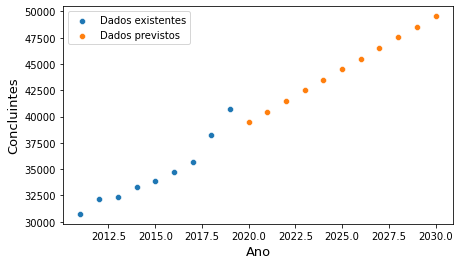

In [ ]:
plt.figure(figsize =(7, 4))
sns.scatterplot(x='NU_ANO', y='CONCLUINTES', data=df_final.loc[0:8], label='Dados existentes', cmap='crest');
sns.scatterplot(x='NU_ANO', y='CONCLUINTES', data=df_final.loc[9:19], label='Dados previstos')
plt.xlabel('Ano', fontsize = 13), plt.ylabel('Concluintes', fontsize = 13)
plt.legend()
plt.savefig('previsao.png', transparent = True)

# TESTES DE OUTROS MODELOS

# Testes regressão logistica

Text(0, 0.5, 'Concluintes')

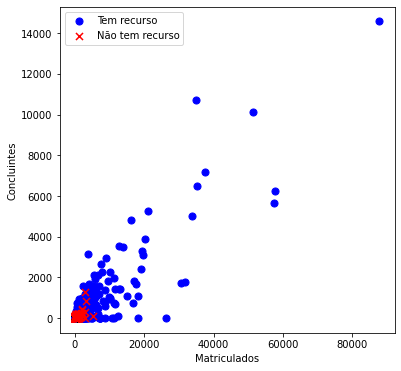

In [ ]:
positive = df_curso_2[df_curso_2['IN_AJUDA_DEFICIENTE'].isin([1])]  
negative = df_curso_2[df_curso_2['IN_AJUDA_DEFICIENTE'].isin([0])]

fig, ax = plt.subplots(figsize=(6,6)) 
ax.scatter(positive['QT_MATRICULA_TOTAL'], positive['QT_CONCLUINTE_TOTAL'], s=50, c='b', marker='o', label='Tem recurso')  
ax.scatter(negative['QT_MATRICULA_TOTAL'], negative['QT_CONCLUINTE_TOTAL'], s=50, c='r', marker='x', label='Não tem recurso')  
ax.legend()  
ax.set_xlabel('Matriculados')  
ax.set_ylabel('Concluintes') 

In [ ]:
X = df_curso_2['IN_AJUDA_DEFICIENTE'].values
X = X.reshape(-1, 1)
y = df_curso_2['QT_CONCLUINTE_TOTAL'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [ ]:
#logit = LogisticRegression()

In [ ]:
#logit.fit(X_train, y_train)

In [ ]:
X = df_curso_2[['QT_CONCLUINTE_TOTAL', 'QT_MATRICULA_TOTAL']].values
#X = X.reshape(-1, 1)
y = df_curso_2['IN_AJUDA_DEFICIENTE'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

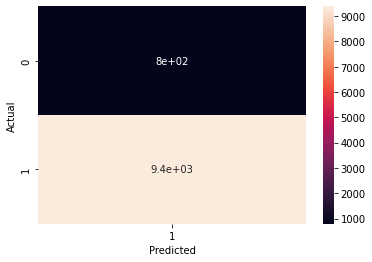

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [ ]:
#Não faz o menor sentido aplicar regressão logistica com esses dados
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.921792100609157


# Testes regressão polinomial


Text(0, 0.5, 'QNT_DE_ALUNOS')

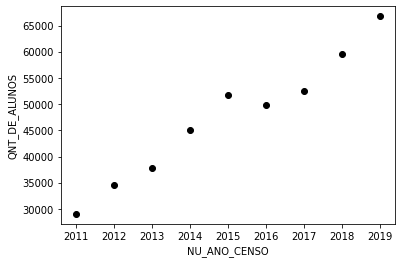

In [ ]:
X = df_alunos_anos["NU_ANO_CENSO"].values
x = X.reshape(-1, 1)
y = df_alunos_anos['QNT_DE_ALUNOS'].values
plt.scatter(X, y, c = "black")
plt.xlabel("NU_ANO_CENSO")
plt.ylabel("QNT_DE_ALUNOS")
# Gráficos para regressões polinomiais devem formar um tipo de "curva", muito provavelmente esses dados não irão servir

In [ ]:
# Importando as funções para a regressão polimonial com sklearn para processar nossos dados
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
pre_process = PolynomialFeatures(degree=2)
# Transformando nosso x para 1, x e xˆ2
X_poly = pre_process.fit_transform(x)
X_poly

array([[1.000000e+00, 2.011000e+03, 4.044121e+06],
       [1.000000e+00, 2.012000e+03, 4.048144e+06],
       [1.000000e+00, 2.013000e+03, 4.052169e+06],
       [1.000000e+00, 2.014000e+03, 4.056196e+06],
       [1.000000e+00, 2.015000e+03, 4.060225e+06],
       [1.000000e+00, 2.016000e+03, 4.064256e+06],
       [1.000000e+00, 2.017000e+03, 4.068289e+06],
       [1.000000e+00, 2.018000e+03, 4.072324e+06],
       [1.000000e+00, 2.019000e+03, 4.076361e+06]])

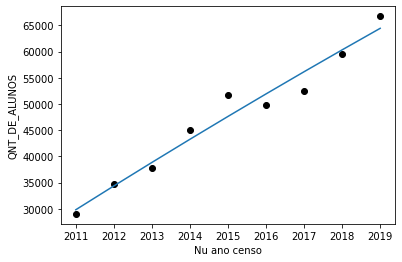

In [ ]:
pr_model = LinearRegression()
pr_model.fit(X_poly, y)
y_pred = pr_model.predict(X_poly)
plt.scatter(x, y, c = "black")
plt.xlabel("Nu ano censo")
plt.ylabel("QNT_DE_ALUNOS")
plt.plot(X, y_pred)
#Os dados não servem para ser usados em uma regressão polinomial

In [ ]:
theta0 = pr_model.intercept_
_ = pr_model.coef_
theta0

array([-1.34928822e+08])

# Testes Árvore de decisão

In [ ]:
#Definindo X e Y
x = df_alunos_anos['NU_ANO_CENSO'].values
X = x.reshape(-1, 1)
y = df_alunos_anos['QNT_DE_ALUNOS'].values

In [ ]:
#Encaixando x e y no modelo de regressão
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
regressor = DecisionTreeRegressor(random_state = 25000)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=25000)

In [ ]:
Y_prediction = regressor.predict(X_test)
print(Y_prediction)

[52542. 29033. 51685.]


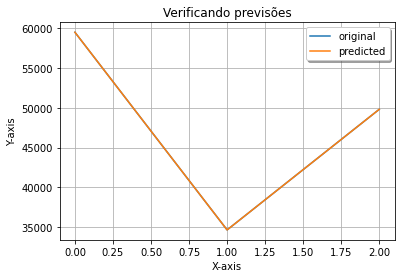

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_test, label="predicted")
plt.title("Verificando previsões")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()
#As previsões estão alinhadas com os dados

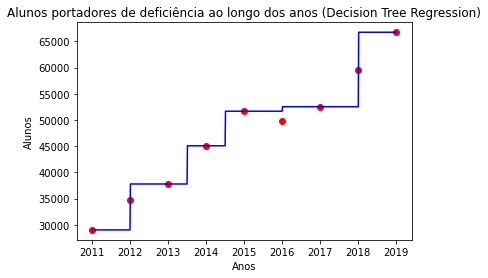

In [ ]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Alunos portadores de deficiência ao longo dos anos (Decision Tree Regression)')
plt.xlabel('Anos')
plt.ylabel('Alunos')
plt.show()